<a href="https://colab.research.google.com/github/MinhDat13/Final_project/blob/main/AI_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from os import listdir
from os.path import isdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
folder = '/content/drive/MyDrive/Data_AI/tomato/tomato_train/'
photos, labels = list(),list()
for file in listdir(folder):
  output = 0
  if file.startswith('do'):
    output = 1
  if file.startswith('vang'):
    output = 2
  if file.startswith('xanh'):
    output = 3
  img =load_img(folder+ file,target_size=(300,400))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)
save('tomato_photos_1.npy',photos)
save('tomato_labels_1.npy',labels)

(300, 300, 400, 3) (300,)


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
feature = np.load('/content/drive/MyDrive/Data_AI/tomato/tomato_photos.npy')
target = np.load('/content/drive/MyDrive/Data_AI/tomato/tomato_labels.npy')
print(feature.shape)
print(target.shape)
x_train, x_test, y_train, y_test = train_test_split(
feature, target, test_size=0.2, random_state=1)
num_classes = len(set(y_train.flatten()))
print("Number of classes: ", num_classes)


(300, 300, 400, 3)
(300,)
Number of classes:  3


In [8]:
x_train = x_train.astype('float32')/255
from keras.utils import to_categorical
y_train = to_categorical(y_train,4)

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import numpy as np

#32 lần tích chập
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape=(300,400,3),padding='Same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#64 lần tích chập
model.add(Conv2D(64,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#128 lần tích chập
model.add(Conv2D(128,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(4,activation='softmax'))

from keras.losses import categorical_crossentropy
model.compile(loss = categorical_crossentropy,optimizer = Adam(),metrics=['accuracy'])
model.summary()
train = model.fit(x_train,y_train,batch_size=64,epochs = 20,verbose = 1)

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cnn_accuracy = accuracy_score(y_test,y_pred_classes)
print('score',cnn_accuracy)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 300, 400, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 150, 200, 32)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 150, 200, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 200, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 100, 64)      0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 75, 100, 64)      

In [10]:
model.save('model_tomat2.h5')

1/1 [==============================] - 0s 105ms/step


'vang'

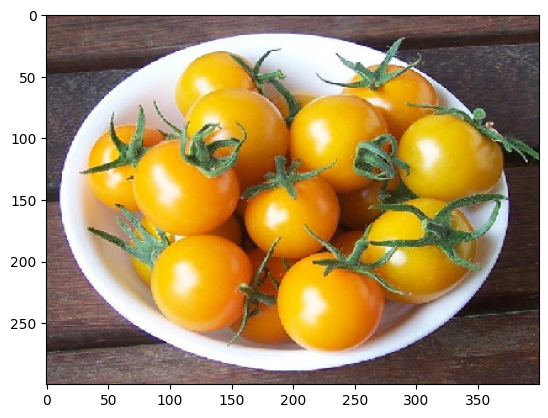

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {1: 'do',3:'vang', 2:'xanh' }
img = load_img("/content/ca4.jpg",target_size=(300,400))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,300,400,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
vat[result[0]]